In [429]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [430]:
# Read the csv file
df = pd.read_csv('care_ema_raw\data.csv', sep=',')
df

C:\Users\anandadi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9,10,12,155) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

### Data Exploration

In [431]:
# Number of rows and columns
df.shape

(110587, 161)

In [432]:
# Number of unique customers
df['Part_ID'].nunique()

391

In [433]:
# average EMA Questions
avg_ema = np.round(df.groupby(['Part_ID']).size().mean(),2)
min_ema = np.round(df.groupby(['Part_ID']).size().min(),2)
max_ema = np.round(df.groupby(['Part_ID']).size().max(),2)
print("Average EMAs recorded: {} ".format(avg_ema))
print("Minimum EMAs recorded: {} ".format(min_ema))
print("Maximum EMAs recorded: {} ".format(max_ema))

Average EMAs recorded: 282.83 
Minimum EMAs recorded: 14 
Maximum EMAs recorded: 1015 


In [434]:
# Number of observations under each assessment type
df.asse_name.value_counts()

Post - Quit Random         32942
Post - Quit Urge           15917
Relapse Random             13210
Pre - Quit Random          10081
Post - Quit Daily Diary     7571
                           ...  
Relapse Urge                2767
Pre - Quit Daily Diary      2659
Relapse Daily Diary         1751
Relapse Smoking             1391
Relapse Smoking - Part2      764
Name: asse_name, Length: 14, dtype: int64

In [435]:
# Number of customers under each assessment type
df.groupby(["asse_name"])['Part_ID'].nunique()

asse_name
Post - Quit Daily Diary    371
Post - Quit Random         382
Post - Quit Slip           366
Post - Quit Urge           367
Pre - Quit Daily Diary     382
                          ... 
Relapse Daily Diary        320
Relapse Random             326
Relapse Smoking            205
Relapse Smoking - Part2    145
Relapse Urge               263
Name: Part_ID, Length: 14, dtype: int64

In [436]:
df.groupby(['Part_ID'])['Initiated'].count()

Part_ID
31017    505
31019     86
31021    186
31022    148
31025    249
        ... 
31832    321
31837    307
31838    258
31839    356
31841    187
Name: Initiated, Length: 391, dtype: int64

In [437]:
# Type of Record Status
df.Record_Status.value_counts()

Completed               80021
Incomplete/Timed Out    18268
CANCELLED               11550
FRAGMENT RECORD           748
Name: Record_Status, dtype: int64

<AxesSubplot:>

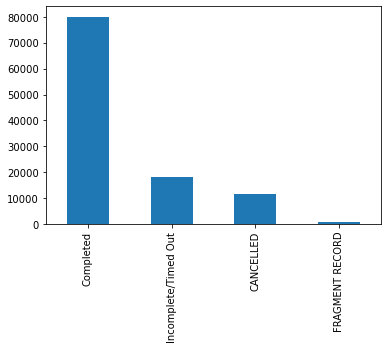

In [438]:
df.Record_Status.value_counts().plot.bar()

<AxesSubplot:>

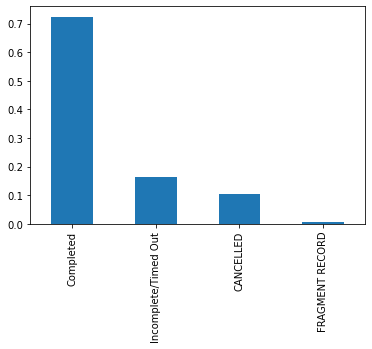

In [439]:
df.Record_Status.value_counts(normalize=True).plot.bar()

In [440]:
# Type of record status under each assessment types
df.groupby(['asse_name','Record_Status']).size()

asse_name                Record_Status       
Post - Quit Daily Diary  Completed                5710
                         FRAGMENT RECORD            47
                         Incomplete/Timed Out     1814
Post - Quit Random       Completed               23849
                         FRAGMENT RECORD           203
                                                 ...  
Relapse Smoking - Part2  Incomplete/Timed Out       59
Relapse Urge             CANCELLED                 730
                         Completed                1963
                         FRAGMENT RECORD            14
                         Incomplete/Timed Out       60
Length: 48, dtype: int64

### Missing Data Analysis

In [441]:
df.asse_name.value_counts()

Post - Quit Random         32942
Post - Quit Urge           15917
Relapse Random             13210
Pre - Quit Random          10081
Post - Quit Daily Diary     7571
                           ...  
Relapse Urge                2767
Pre - Quit Daily Diary      2659
Relapse Daily Diary         1751
Relapse Smoking             1391
Relapse Smoking - Part2      764
Name: asse_name, Length: 14, dtype: int64

In [442]:
#df = df.loc[(df['asse_name'] == 'Post - Quit Random') | (df['asse_name'] == 'Relapse Random')]
df = df.loc[(df['asse_name'] == 'Pre - Quit Random') | (df['asse_name'] == 'Post - Quit Random') | (df['asse_name'] == 'Relapse Random')]
df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5
0,Pre - Quit Random,3eaf4102-058c-43b3-a669-84f3695421a8,Completed,31017,1,2005-05-10 16:10:23,0,NaN,NaN,NaN,NaN,2005-05-10 16:10:47,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 16:16:04,1.0,1.0,2005-05-10 16:16:04,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,0.0,0.0,1.0,0.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,4.0,4.0,4.0,5.0,4.0,3.0,2.0,4.0,5.0,3.0,2.0,4.0,3.0,NaN,NaN,2.0,1.0,1.0,1.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pre - Quit Random,d2a1c7ee-0de7-464b-9119-383e2e3a3bb6,Completed,31017,1,2005-05-10 18:24:02,0,NaN,NaN,NaN,NaN,2005-05-10 18:24:26,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,2005-05-10 18:37:34,1.0,1.0,2005-05-10 18:37:36,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,1.0,1.0,1.0,3.0,4.0,3.0,3.0,5.0,2.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,3.0,3.0,3.0,3.0,1.0,3.0,4.0,3.0,4.0,1.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pre - Quit Random,fc3361f4-238c-48fd-b00d-c95c7edbf52

In [443]:
df['Part_ID'].nunique()

390

In [444]:
record_status_np = np.array(df['Record_Status'])

incomplete_rand_idx = np.where((record_status_np!='Completed'))[0]
incomplete_rand_df = df.iloc[incomplete_rand_idx,:].reset_index(drop=True)


# Complete EMAs are the ones whose Record_Status is Complete
complete_rand_idx = np.where((record_status_np=='Completed'))[0]
complete_records_df = df.iloc[complete_rand_idx,:].reset_index(drop=True)
# adding a column to complete records dataframe with column name as 'status' and value as 'Complete'
status_list = []
for i in range(41750):
    status_list.append('Complete')
complete_records_df.insert(161, 'status', status_list)


# Missing EMAs are the incomplete EMAs(from above) whose AssessmentBegin is null
missing_ema_ind_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].isna()].index.tolist()
missing_records_df = incomplete_rand_df.loc[missing_ema_ind_list].reset_index(drop=True)
# adding a column to missing records dataframe with column name as 'status' and value as 'Missing'
status_list = []
for i in range(13277):
    status_list.append('Missing')
missing_records_df.insert(161, 'status', status_list)


# Incomplete EMAs are the incomplete EMAs(from above) whose AssessmentBegin is not null
incomplete_records_list = incomplete_rand_df[incomplete_rand_df['AssessmentBegin'].notna()].index.tolist()
incomplete_records_df = incomplete_rand_df.loc[incomplete_records_list].reset_index(drop=True)
# adding a column to incomplete records dataframe column name as 'status' and value as 'Incomplete'
status_list = []
for i in range(1206):
    status_list.append('Incomplete')
incomplete_records_df.insert(161, 'status', status_list)


df = pd.concat([missing_records_df, incomplete_records_df, complete_records_df]).reset_index(drop=True)
df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [445]:
summary_df = df.groupby(['status']).agg({'Record_ID': ['count']}).reset_index()
summary_df.columns = ['status', 'ema count']
summary_df

,status,ema count
0,Complete,41750
1,Incomplete,1206
2,Missing,13277


<AxesSubplot:title={'center':'Distribution of EMAs and status'}, xlabel='Status of EMAs', ylabel='Number of EMAs'>

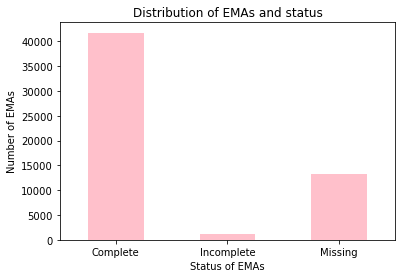

In [446]:
summary_df = summary_df.set_index('status')
summary_df.plot(kind='bar', color='pink', title='Distribution of EMAs and status', legend=None, rot=0, xlabel='Status of EMAs', ylabel='Number of EMAs')

In [447]:
c_df = df.groupby('Part_ID').apply(lambda x: x[x['status'] == 'Complete']['Record_ID'].count()).reset_index()
c_df.columns = ['Part_ID', 'complete_ema_count']
m_df = df.groupby('Part_ID').apply(lambda x: x[x['status'] == 'Missing']['Record_ID'].count()).reset_index()
m_df.columns = ['Part_ID', 'missing_ema_count']
i_df = df.groupby('Part_ID').apply(lambda x: x[x['status'] == 'Incomplete']['Record_ID'].count()).reset_index()
i_df.columns = ['Part_ID', 'incomplete_ema_count']
t_df = df.groupby('Part_ID').agg({'Record_ID': ['count']}).reset_index()
t_df.columns = ['Part_ID', 'total_ema_count']
t_c_df = t_df.merge(c_df, how = 'outer')
t_c_df['complete_ema_percent'] = round((t_c_df['complete_ema_count'] / t_c_df['total_ema_count']) * 100, 2)
t_c_m_df = t_c_df.merge(m_df, how = 'outer')
t_c_m_df['missing_ema_percent'] = round((t_c_m_df['missing_ema_count'] / t_c_m_df['total_ema_count']) * 100, 2)
t_c_m_i_df = t_c_m_df.merge(i_df, how = 'outer')
t_c_m_i_df['incomplete_ema_percent'] = round((t_c_m_i_df['incomplete_ema_count'] / t_c_m_i_df['total_ema_count']) * 100, 2)
t_c_m_i_df['total_percent'] = t_c_m_i_df['complete_ema_percent'] + t_c_m_i_df['missing_ema_percent'] + t_c_m_i_df['incomplete_ema_percent']
t_c_m_i_df

,Part_ID,total_ema_count,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent
0,31017,119,85,71.43,30,25.21,4,3.36,100.00
1,31019,56,5,8.93,50,89.29,1,1.79,100.01
2,31021,115,77,66.96,34,29.57,4,3.48,100.01
3,31022,85,79,92.94,6,7.06,0,0.00,100.00
4,31025,155,147,94.84,8,5.16,0,0.00,100.00
...,...,...,...,...,...,...,...,...,...
385,31832,147,132,89.80,13,8.84,2,1.36,100.00
386,31837,129,112,86.82,17,13.18,0,0.00,100.00
387,31838,162,151,93.21,8,4.94,3,1.85,100.00
388,31839,112,55,49.11,22,19.64,35,31.25,100.00


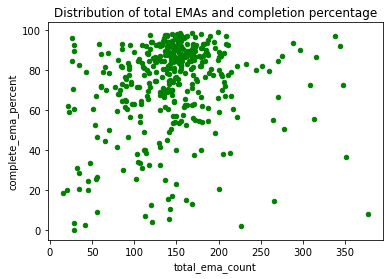

In [448]:
ax = t_c_df.plot.scatter(x="total_ema_count", y="complete_ema_percent", color='green', title='Distribution of total EMAs and completion percentage')

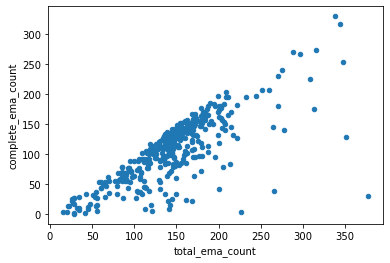

In [449]:
ax = t_c_df.plot.scatter(x="total_ema_count", y="complete_ema_count")

In [450]:
df['Final_Quit_Date'] = ''
df.loc[(df['Final_Quit_Date'] == '') & (df['Quit_Date4'].notnull()),'Final_Quit_Date'] = df['Quit_Date4']
df.loc[(df['Final_Quit_Date'] == '') & (df['Quit_Date3'].notnull()),'Final_Quit_Date'] = df['Quit_Date3']
df.loc[(df['Final_Quit_Date'] == '') & (df['Quit_Date2'].notnull()),'Final_Quit_Date'] = df['Quit_Date2']
df.loc[(df['Final_Quit_Date'] == '') & (df['Quit_Date1'].notnull()),'Final_Quit_Date'] = df['Quit_Date1']
df['Final_Quit_Date']

0        2005-05-16 00:00:00
1        2005-05-16 00:00:00
2        2005-05-16 00:00:00
3        2005-05-16 00:00:00
4        2005-07-02 00:00:00
                ...         
56228    2007-05-04 00:00:00
56229    2007-05-04 00:00:00
56230    2007-05-04 00:00:00
56231    2007-05-04 00:00:00
56232    2007-05-04 00:00:00
Name: Final_Quit_Date, Length: 56233, dtype: object

In [451]:
df['Initiated'] = pd.to_datetime(df['Initiated'])
df['Final_Quit_Date'] = pd.to_datetime(df['Final_Quit_Date'])
#df['new_day'] = (df['Initiated']-df['Final_Quit_Date']).dt.days
df['new_day'] = (df['Initiated'].dt.date-df['Final_Quit_Date'].dt.date).dt.days

df['new_day']

0        -5
1        -4
2        -3
3        -2
4        -9
         ..
56228    10
56229    10
56230    10
56231    10
56232    19
Name: new_day, Length: 56233, dtype: int64

In [452]:
pd.set_option("display.max_rows", 10)
df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [453]:
df = df[(df.new_day>=-7) & (df.new_day<=27)]
df

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Pre - Quit Random,fc6e2b67-72a7-48e0-937a-32830f339036,Incomplete/Timed Out,31017,2,2005-05-11 19:45:10,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,NaN,0.0,NaN,2005-05-11 19:48:17,2005-05-11 19:48:15,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Missing,2005-05-16,-5
1,Pre - Quit Random,aa9588b6-683f-46f5-a6aa-afc291fcd274,Incomplete/Timed Out,31017,3,2005-05-12 12:19:23,4,2005-05-12 12:22:09,2005-05-12 12:27:16,2005-05-12 12:32:19,2005-05-12 12:37:34,NaN,NaN,NaN,aed9a29b-7e79-4ad9-b9e9-79c77ba9d7a2,2,1,NaN,1.0,0.0,NaN,2005-05-12 12:45:36,2005-05-12 12:45:36,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [454]:
#df2.to_csv(r'care_ema_raw\test1.csv', index=False)

In [455]:
pd.set_option("display.max_rows", 50)
df[df.Part_ID==31044].groupby(['new_day','Part_ID']).Record_ID.count()

new_day  Part_ID
-7       31044       3
-6       31044       4
-2       31044       4
-1       31044       4
 0       31044       3
 1       31044       4
 2       31044       4
 3       31044       4
 4       31044      12
 5       31044       4
 6       31044       4
 7       31044       4
 8       31044       4
 9       31044       4
 10      31044       4
 11      31044       4
 12      31044       4
 13      31044       4
 14      31044       4
 15      31044       4
 16      31044       4
 17      31044       4
 18      31044       4
 19      31044       4
 20      31044       4
 21      31044       4
 22      31044       4
 23      31044       4
 24      31044       4
 25      31044       4
 26      31044       4
 27      31044       4
Name: Record_ID, dtype: int64

In [456]:
pd.set_option("display.max_rows", 10)
df2 = df.groupby(['new_day','Part_ID']).filter(lambda x: x.Record_ID.count() > 4).sort_values(['Part_ID','new_day'])
df2.reset_index(inplace=True)
df2.pop('index')
df2

,asse_name,Record_ID,Record_Status,Part_ID,Day,Initiated,SnzCount,SnzTime1,SnzTime2,SnzTime3,SnzTime4,AssessmentBegin,AssessmentCancelled,ParticipantComplied,AssessmentID,Asse_Type,Asse_Mode,AssessmentEnd,Responded,Completed,AssessmentCompleted,AssessmentNOTCompleted,AssessmentTimedOut,StartDate,Quit_Date1,Quit_Date2,Quit_Date3,Quit_Date4,Activity1,Activity2,Smoking_Items1,Social_Setting1,Social_Setting2,Abstinence_Self_Efficacy1,Affect1,Affect10,Affect11,Affect2,Affect3,Affect4,Affect5,Affect6,Affect7,Affect8,Affect9,Cigarette_Availability1,Concentration1,CopBehavior1,CopBehavior2,Expectancies1,Expectancies2,Hunger1,Motivation1,Motivation2,Restriction1,Smoking_Items2,Smoking_Items3,Stressor1,Stressor2,Stressor3,Stressor4,Urge1,Urge2,Urge3,Activity2a_1,Activity2a_2,Activity2a_3,Activity2a_4,Activity2a_5,Alcohol1,Cigarettes2,Alcohol1a,Alcohol1b,Alcohol1c,Alcohol1d,Alcohol1e,Alcohol1f,Cigarettes1,Cigarettes3,Cigarettes4,DailyCopingInventory1,DailyCopingInventory2,DailyCopingInventory3,DailyCopingInventory4,DailyCopingInventory5,DailyCopingInventory6,DailyCopingInventory7,DailyCopingInventory8,DailyCopingInventory9,ExtrinisicItems1,ExtrinisicItems2,ExtrinisicItems3,ExtrinisicItems4,IntrinsicItems1,IntrinsicItems2,IntrinsicItems3,IntrinsicItems4,PartnerSupport1,PartnerSupport2,PerceivedStress1,PerceivedStress2,PerceivedStress3,PerceivedStress4,SelfReportedDistractionItems1,SelfReportedDistractionItems2,SelfReportedDistractionItems3,SelfReportedDistractionItems4,Sleep1,Sleep2,Sleep3,Sleep4,Location1,Reinforcement1,Reinforcement2,Reinforcement3,Route_To_Slip_Assessment,Slip_Activity1,Slip_Activity2,Slip_Social_Setting1,Slip_Social_Setting2,Attribution1,Attribution2,Attribution3,Attribution4,Intention1,Slip_Abstinence_Self_Efficacy1,Slip_Affect1,Slip_Affect10,Slip_Affect11,Slip_Affect2,Slip_Affect3,Slip_Affect4,Slip_Affect5,Slip_Affect6,Slip_Affect7,Slip_Affect8,Slip_Affect9,Slip_Cigarette_Availability1,Slip_Concentration1,Slip_CopBehavior1,Slip_CopBehavior2,Slip_Expectancies1,Slip_Expectancies2,Slip_Hunger1,Slip_Motivation1,Slip_Motivation2,Slip_Restriction1,Slip_Stressor1,Slip_Stressor2,Slip_Stressor3,Slip_Stressor4,Slip_Urge1,Slip_Urge2,Slip_Urge3,SlipCigarettes1,TimeSinceSmoked1,Slip_Activity2a_1,Slip_Activity2a_2,Slip_Activity2a_3,Slip_Activity2a_4,Slip_Activity2a_5,status,Final_Quit_Date,new_day
0,Post - Quit Random,314d78fe-c016-4957-9a90-ace733a9835a,Completed,31017,8,2005-05-17 13:51:53,1,2005-05-17 13:52:15,NaN,NaN,NaN,2005-05-17 13:52:55,NaN,NaN,4d159657-4d70-40af-bddb-9fc9500dd074,2,2,2005-05-17 13:53:14,1.0,1.0,2005-05-17 13:53:14,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Complete,2005-05-16,1
1,Relapse Random,d45bc942-0413-4308-8398-4cabdfb46253,Completed,31017,8,2005-05-17 14:47:24,0,NaN,NaN,NaN,NaN,2005-05-17 14:47:33,NaN,NaN,889dda49-4950-469b-818d-56c5c421ceb0,2,3,2005-05-17 14:54:38,1.0,1.0,2005-05-17 14:54:38,NaN,NaN,2005-05-10,2005-05-17,2005-05-16 00:00:00,NaN,NaN,0.0,1.0,0.0,1.0,0.0,5.0,4.0,4.0,3.0,3.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,5.0,4.0,2.0,1.0,5.0,4.0,1.0,NaN,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [457]:
pd.set_option("display.max_rows", None)
df3 = df2.groupby(['Part_ID','new_day'])['Record_ID'].count().reset_index()
df3

,Part_ID,new_day,Record_ID
0,31017,1,7
1,31017,15,5
2,31017,16,13
3,31017,18,7
4,31017,27,10
5,31021,6,7
6,31022,-1,5
7,31022,8,8
8,31025,3,5
9,31025,11,12


In [458]:
pd.set_option("display.max_rows", 10)

In [459]:
len(df3.Part_ID.unique())

335

In [460]:
df4 = df.groupby(['Part_ID','new_day'])['Record_ID'].count().reset_index()
df4

,Part_ID,new_day,Record_ID
0,31017,-6,2
1,31017,-5,4
2,31017,-4,4
3,31017,-3,4
4,31017,-2,4
...,...,...,...
11042,31841,18,4
11043,31841,19,4
11044,31841,20,4
11045,31841,21,4


In [461]:
pd.set_option("display.max_rows", None)
df5 = df4.groupby(['Part_ID'])['Record_ID'].mean().reset_index().sort_values('Record_ID')
df5[df5.Record_ID>5]

,Part_ID,Record_ID
356,31760,5.028571
362,31772,5.030303
35,31083,5.032258
141,31296,5.043478
324,31667,5.057143
31,31079,5.057143
102,31226,5.057143
355,31758,5.058824
217,31455,5.058824
330,31679,5.085714


<AxesSubplot:xlabel='new_day'>

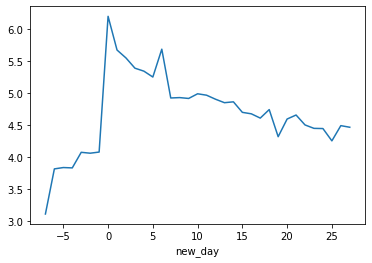

In [462]:
df4.groupby(['new_day'])['Record_ID'].mean().plot()

In [463]:
pd.set_option("display.max_rows", None)
df1 = df.groupby(['new_day','asse_name'])['Record_ID'].count().reset_index().iloc[39:119]
df1.reset_index(inplace=True)
df1.pop('index')
df1

,new_day,asse_name,Record_ID
0,8,Post - Quit Random,1105
1,8,Pre - Quit Random,4
2,8,Relapse Random,460
3,9,Post - Quit Random,1122
4,9,Relapse Random,428
5,10,Post - Quit Random,1091
6,10,Relapse Random,462
7,11,Post - Quit Random,1119
8,11,Relapse Random,457
9,12,Post - Quit Random,1094


In [464]:
df1.to_csv(r'care_ema_raw\test.csv', index=False)

In [465]:
df1 = df.groupby(['Part_ID','Final_Quit_Date']).agg({'Initiated': ['min', 'max'],'Record_ID': ['count']}).reset_index()
pd.set_option("display.max_rows", 10)
df1.sort_values(by=('Initiated','max'))

Part_ID Final_Quit_Date           Initiated                     Record_ID
                                            min                 max     count
21    31064      2005-06-06 2005-05-31 12:43:05 2005-06-06 09:50:33        27
3     31022      2005-05-21 2005-05-18 12:22:22 2005-06-06 21:05:34        85
0     31017      2005-05-16 2005-05-10 16:10:23 2005-06-12 20:53:49       113
2     31021      2005-05-16 2005-05-11 13:26:20 2005-06-12 23:14:30       107
10    31038      2005-05-31 2005-05-25 11:36:16 2005-06-15 21:34:33       133
..      ...             ...                 ...                 ...       ...
383   31825      2007-04-25 2007-04-20 12:48:25 2007-05-22 20:23:12       132
386   31837      2007-04-29 2007-04-22 14:08:14 2007-05-24 07:32:25       117
387   31838      2007-04-29 2007-04-24 21:38:07 2007-05-26 23:42:45       153
388   31839      2007-05-04 2007-05-01 14:51:38 2007-05-29 12:23:59       112
389   31841      2007-05-08 2007-05-01 16:32:20 2007-05-30 16:05:08       112

[390 rows x 5 columns]

In [466]:
#pd.set_option("display.max_rows", 10)

In [467]:
# df.groupby('new_day')['Part_ID'].nunique().reset_index().iloc[36:71]

In [468]:
day_part_count_df = df.groupby('new_day')['Part_ID'].nunique().reset_index()
comp_df = df.groupby('new_day').apply(lambda x: x[x['status'] == 'Complete']['Record_ID'].count()).reset_index()
comp_df.columns = ['new_day', 'complete_ema_count']
incomp_df = df.groupby('new_day').apply(lambda x: x[x['status'] == 'Incomplete']['Record_ID'].count()).reset_index()
incomp_df.columns = ['new_day', 'incomplete_ema_count']
missing_df = df.groupby('new_day').apply(lambda x: x[x['status'] == 'Missing']['Record_ID'].count()).reset_index()
missing_df.columns = ['new_day', 'missing_ema_count']
total_df = df.groupby('new_day').agg({'Record_ID': ['count']}).reset_index()
total_df.columns = ['new_day', 'total_ema_count']

#pd.set_option("display.max_rows", 28)

total_comp_df = total_df.merge(comp_df, how = 'outer')
total_comp_df['complete_ema_percent'] = round((total_comp_df['complete_ema_count'] / total_comp_df['total_ema_count']) * 100, 2)
total_comp_miss_df = total_comp_df.merge(missing_df, how = 'outer')
total_comp_miss_df['missing_ema_percent'] = round((total_comp_miss_df['missing_ema_count'] / total_comp_miss_df['total_ema_count']) * 100, 2)
total_comp_miss_incomp_df = total_comp_miss_df.merge(incomp_df, how = 'outer')
total_comp_miss_incomp_df['incomplete_ema_percent'] = round((total_comp_miss_incomp_df['incomplete_ema_count'] / total_comp_miss_incomp_df['total_ema_count']) * 100, 2)
total_comp_miss_incomp_df['total_percent'] = total_comp_miss_incomp_df['complete_ema_percent'] + total_comp_miss_incomp_df['missing_ema_percent'] + total_comp_miss_incomp_df['incomplete_ema_percent']

total_new_df = total_comp_miss_incomp_df.merge(day_part_count_df, how = 'outer')
total_new_df['complete_avg_ema'] = round((total_comp_miss_incomp_df['complete_ema_count'] / total_new_df['Part_ID']), 2)
total_new_df['incomplete_avg_ema'] = round((total_comp_miss_incomp_df['incomplete_ema_count'] / total_new_df['Part_ID']), 2)
total_new_df['missing_avg_ema'] = round((total_comp_miss_incomp_df['missing_ema_count'] / total_new_df['Part_ID']), 2)
total_new_df

,new_day,total_ema_count,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,Part_ID,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
0,-7,888,639,71.96,213,23.99,36,4.05,100.00,285,2.24,0.13,0.75
1,-6,1234,910,73.74,286,23.18,38,3.08,100.00,323,2.82,0.12,0.89
2,-5,1333,991,74.34,313,23.48,29,2.18,100.00,347,2.86,0.08,0.90
3,-4,1404,1028,73.22,343,24.43,33,2.35,100.00,366,2.81,0.09,0.94
4,-3,1489,1084,72.80,366,24.58,39,2.62,100.00,365,2.97,0.11,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,23,1247,946,75.86,278,22.29,23,1.84,99.99,280,3.38,0.08,0.99
31,24,1215,908,74.73,288,23.70,19,1.56,99.99,273,3.33,0.07,1.05
32,25,1154,855,74.09,279,24.18,20,1.73,100.00,271,3.15,0.07,1.03
33,26,1133,839,74.05,276,24.36,18,1.59,100.00,252,3.33,0.07,1.10


In [469]:
total_new_df.insert(1, 'new_day_modified', total_new_df['new_day'] + 7)
total_new_df.insert(3, 'Part_ID_modified', round((total_new_df['Part_ID'] / 390), 2))
total_new_df

,new_day,new_day_modified,total_ema_count,Part_ID_modified,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,Part_ID,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
0,-7,0,888,0.73,639,71.96,213,23.99,36,4.05,100.00,285,2.24,0.13,0.75
1,-6,1,1234,0.83,910,73.74,286,23.18,38,3.08,100.00,323,2.82,0.12,0.89
2,-5,2,1333,0.89,991,74.34,313,23.48,29,2.18,100.00,347,2.86,0.08,0.90
3,-4,3,1404,0.94,1028,73.22,343,24.43,33,2.35,100.00,366,2.81,0.09,0.94
4,-3,4,1489,0.94,1084,72.80,366,24.58,39,2.62,100.00,365,2.97,0.11,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,23,30,1247,0.72,946,75.86,278,22.29,23,1.84,99.99,280,3.38,0.08,0.99
31,24,31,1215,0.70,908,74.73,288,23.70,19,1.56,99.99,273,3.33,0.07,1.05
32,25,32,1154,0.69,855,74.09,279,24.18,20,1.73,100.00,271,3.15,0.07,1.03
33,26,33,1133,0.65,839,74.05,276,24.36,18,1.59,100.00,252,3.33,0.07,1.10


In [470]:
care_df = total_new_df

In [471]:
total_df

,new_day,total_ema_count
0,-7,888
1,-6,1234
2,-5,1333
3,-4,1404
4,-3,1489
...,...,...
30,23,1247
31,24,1215
32,25,1154
33,26,1133


<AxesSubplot:xlabel='new_day'>

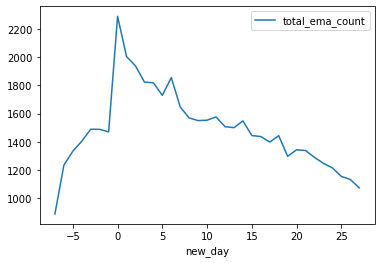

In [472]:
total_df.plot(x="new_day", y="total_ema_count")

<AxesSubplot:>

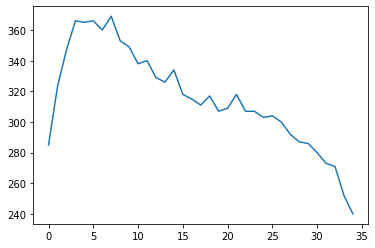

In [473]:
# TODO for both CARE and PNS in one graph (line graph); scale from 0 to 400 (y axis); add labels to x and y axis
# number of partipants with atleast one ema triggered per day
total_new_df['Part_ID'].plot()

In [474]:
#!pip install import-ipynb
import import_ipynb
import PNS_missing_data_analysis as pns

In [475]:
df = pns.df
df.pop('study_day')

0       -6
1       -6
2       -5
3       -5
4       -5
        ..
9736    19
9737    19
9738    20
9739    20
9740    20
Name: study_day, Length: 9441, dtype: int64

In [476]:
df.insert(5,'study_day','')
# calculate the study day from the EMA delivered time and smoking quit time
df['delivered_hrts'] = pd.to_datetime(df['delivered_hrts'])
df['quit_hrts'] = pd.to_datetime(df['quit_hrts'])
#df['study_day'] = (df['delivered_hrts']-df['quit_hrts']).dt.days
df['study_day'] = (df['delivered_hrts'].dt.date-df['quit_hrts'].dt.date).dt.days
df

,id,callnumr,start_study_hrts,quit_hrts,end_study_hrts,study_day,day_time,time_of_day,day_time_lagged,day_time_delta,record_id,assessment_type,use_as_postquit,sensitivity,delivered_hrts,begin_hrts,end_hrts,engagement,previous_ema_engagement,next_ema_engagement,time_hrts,record_status,with_any_response,ema_order,previous_ema_smoking_qty,smoking_qty,smoking_indicator,smoking_delta_minutes,C2PQR,Consume1,PreQRSmoking1,SocialSet2,SocialSet4,SSPQR1,SSPQR3,AbsSelfEff,Enthusiastic,hostile,happy,relaxed,bored,sad,angry,anxious,restless,stressed,CigAv,D1PQR,Distract1,Distract2,Distract3,Distract4,Expect1,Expect2,Lonely1,Lonely2,Lonely3,Motive1,Motive2,Restriction,Smoking2_PreQ_Random,Smoking3,Stressor1_PreQ_Random,Stressor2,Urge1,Urge2,Urge3,Consume3_1,Consume3_2,Consume3_3,Consume3_4,Consume3_5,Discrim2_1,Discrim2_2,Discrim2_3,Discrim2_4,Discrim2_5,Discrim2_6,Discrim2_7,Discrim2_8,Location_1,Location_2,Location_3,Location_4,Location_5,Location_6,Location_7,Stressor3_1,Stressor3_2,Stressor3_3,Stressor3_4,Stressor3_5,Stressor3_6,Stressor3_7,Stressor3_8,C2PostQR,PostQRSmoking1,SSPostQR1,SSPostQR3,D1PostQR,Smoking2_PostQ_Random,Stressor1_PostQ_Random
0,3002,PF3306T,2009-09-30 00:00:00,2009-10-07 04:00:00,2009-10-28 00:00:00,-6,1.833,0.833,NaN,0.000,b8f5c687-577e-4161-9d77-52dabaa199a2,Pre-Quit Random,0,1,2009-10-01 20:13:00,NaN,2009-10-01 20:15:59,0,0,0,2009-10-01 20:13:00,Incomplete/Timed Out,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3002,PF3306T,2009-09-30 00:00:00,2009-10-07 04:00:00,2009-10-28 00:00:00,-6,1.833,0.833,1.833,0.000,db2e7cc8-65f8-4856-8216-e22815438228,Pre-Quit Random,0,1,2009-10-01 20:24:00,NaN,2009-10-01 20:27:00,0,0,1,2009-10-01 20:24:00,Incomplete/Timed Out,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3002,PF3306T,2009-09-30 00:00:00,2009-10-07 04:00:00,2009-10-28 00:00:00,-5,2.375,0.375,1.833,0.542,83df3759-bcb6-4603-8bf5-625796e31ef5,Pre-Quit Random,0,1,2009-10-02 09:20:02,2009-10-02 09:20:34,2009-10-02 09:23:45,1,0,1,2009-10-02 09:20:34,Completed,1,11.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,0.0,4.0,4.0,2.0,3.0,3.0,2.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,3.0,4.0,4.0,2.0,4.0,5.0,2.0,1.0,1.0,4.0,4.0,1.0,NaN,NaN,1.0,NaN,1.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3002,PF3306T,2009-09-30 00:00:00,2009-10-07 04:00:00,2009-10-28 00:00:00,-5,2.625,0.625,2.375,0.250,ea453e9d-046f-4692-8a07-c92d280aa644,Pre-Quit Random,0,1,2009-10-02 15:20:19,2009-10-02 15:20:38,2009-10-02 15:23:29,1,1,0,2009-10-02 15:20:38,Completed,1,15.0,0.0,0.0,0.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,1.0,4.0,2.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,2.0,2.0,4.0,4.0,3.0,NaN,NaN,1.0,NaN,4.0,4.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3002,PF3306T,2009-09-30 00:00:00,2009-10-07 04:00:00,2009-10-28 00:00:00,-5,2.667,0.667,2.625,0.042,264b2eaf-92a0-4cb6-962c-fe4e8200534e,Pre-Quit Random,0,1,2009-10-02 16:30:54,NaN,2009-10-02 16:33:59,0,1,1,2009-10-02 16:30:54,Incomplete/Timed Out,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [477]:
day_part_count_df = df.groupby('study_day')['id'].nunique().reset_index()

comp_df = df.groupby('study_day').apply(lambda x: x[x['record_status'] == 'Completed']['record_id'].count()).reset_index()
comp_df.columns = ['study_day', 'complete_ema_count']

incomp_df = df.groupby('study_day').apply(lambda x: x[(x['record_status'] == 'FRAGMENT RECORD') | ((x['record_status'] == 'Incomplete/Timed Out') & (x['with_any_response'] == 1))]['record_id'].count()).reset_index()
incomp_df.columns = ['study_day', 'incomplete_ema_count']

missing_df = df.groupby('study_day').apply(lambda x: x[(x['with_any_response'] == 0)]['record_id'].count()).reset_index()
missing_df.columns = ['study_day', 'missing_ema_count']

total_df = df.groupby('study_day').agg({'record_id': ['count']}).reset_index()
total_df.columns = ['study_day', 'total_ema_count']

total_comp_df = total_df.merge(comp_df, how = 'outer')
total_comp_df['complete_ema_percent'] = round((total_comp_df['complete_ema_count'] / total_comp_df['total_ema_count']) * 100, 2)

total_comp_miss_df = total_comp_df.merge(missing_df, how = 'outer')
total_comp_miss_df['missing_ema_percent'] = round((total_comp_miss_df['missing_ema_count'] / total_comp_miss_df['total_ema_count']) * 100, 2)

total_comp_miss_incomp_df = total_comp_miss_df.merge(incomp_df, how = 'outer')
total_comp_miss_incomp_df['incomplete_ema_percent'] = round((total_comp_miss_incomp_df['incomplete_ema_count'] / total_comp_miss_incomp_df['total_ema_count']) * 100, 2)

total_comp_miss_incomp_df['total_percent'] = total_comp_miss_incomp_df['complete_ema_percent'] + total_comp_miss_incomp_df['missing_ema_percent'] + total_comp_miss_incomp_df['incomplete_ema_percent']

total_new_df = total_comp_miss_incomp_df.merge(day_part_count_df, how = 'outer')
total_new_df['complete_avg_ema'] = round((total_comp_miss_incomp_df['complete_ema_count'] / total_new_df['id']), 2)
total_new_df['incomplete_avg_ema'] = round((total_comp_miss_incomp_df['incomplete_ema_count'] / total_new_df['id']), 2)
total_new_df['missing_avg_ema'] = round((total_comp_miss_incomp_df['missing_ema_count'] / total_new_df['id']), 2)
total_new_df

,study_day,total_ema_count,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,id,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
0,-7,44,33,75.00,8,18.18,3,6.82,100.00,19,1.74,0.16,0.42
1,-6,348,259,74.43,69,19.83,20,5.75,100.01,132,1.96,0.15,0.52
2,-5,365,246,67.40,90,24.66,29,7.95,100.01,128,1.92,0.23,0.70
3,-4,359,241,67.13,100,27.86,18,5.01,100.00,129,1.87,0.14,0.78
4,-3,330,217,65.76,101,30.61,12,3.64,100.01,122,1.78,0.10,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,16,346,252,72.83,89,25.72,5,1.45,100.00,126,2.00,0.04,0.71
24,17,350,255,72.86,89,25.43,6,1.71,100.00,124,2.06,0.05,0.72
25,18,322,221,68.63,97,30.12,4,1.24,99.99,118,1.87,0.03,0.82
26,19,337,236,70.03,95,28.19,6,1.78,100.00,118,2.00,0.05,0.81


In [478]:
total_new_df.insert(1, 'study_day_modified', total_new_df['study_day'] + 7)
total_new_df.insert(3, 'id_modified', round((total_new_df['id'] / 163),2))
total_new_df

,study_day,study_day_modified,total_ema_count,id_modified,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,id,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
0,-7,0,44,0.12,33,75.00,8,18.18,3,6.82,100.00,19,1.74,0.16,0.42
1,-6,1,348,0.81,259,74.43,69,19.83,20,5.75,100.01,132,1.96,0.15,0.52
2,-5,2,365,0.79,246,67.40,90,24.66,29,7.95,100.01,128,1.92,0.23,0.70
3,-4,3,359,0.79,241,67.13,100,27.86,18,5.01,100.00,129,1.87,0.14,0.78
4,-3,4,330,0.75,217,65.76,101,30.61,12,3.64,100.01,122,1.78,0.10,0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,16,23,346,0.77,252,72.83,89,25.72,5,1.45,100.00,126,2.00,0.04,0.71
24,17,24,350,0.76,255,72.86,89,25.43,6,1.71,100.00,124,2.06,0.05,0.72
25,18,25,322,0.72,221,68.63,97,30.12,4,1.24,99.99,118,1.87,0.03,0.82
26,19,26,337,0.72,236,70.03,95,28.19,6,1.78,100.00,118,2.00,0.05,0.81


In [480]:
pns_df = total_new_df

In [485]:
pns_df = pns_df.drop(pns_df.index[0])
pns_df

,study_day,study_day_modified,total_ema_count,id_modified,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,id,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
1,-6,1,348,0.81,259,74.43,69,19.83,20,5.75,100.01,132,1.96,0.15,0.52
2,-5,2,365,0.79,246,67.40,90,24.66,29,7.95,100.01,128,1.92,0.23,0.70
3,-4,3,359,0.79,241,67.13,100,27.86,18,5.01,100.00,129,1.87,0.14,0.78
4,-3,4,330,0.75,217,65.76,101,30.61,12,3.64,100.01,122,1.78,0.10,0.83
5,-2,5,340,0.77,214,62.94,109,32.06,17,5.00,100.00,126,1.70,0.13,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,16,23,346,0.77,252,72.83,89,25.72,5,1.45,100.00,126,2.00,0.04,0.71
24,17,24,350,0.76,255,72.86,89,25.43,6,1.71,100.00,124,2.06,0.05,0.72
25,18,25,322,0.72,221,68.63,97,30.12,4,1.24,99.99,118,1.87,0.03,0.82
26,19,26,337,0.72,236,70.03,95,28.19,6,1.78,100.00,118,2.00,0.05,0.81


In [486]:
care_df = care_df.drop(care_df.index[0])
care_df

,new_day,new_day_modified,total_ema_count,Part_ID_modified,complete_ema_count,complete_ema_percent,missing_ema_count,missing_ema_percent,incomplete_ema_count,incomplete_ema_percent,total_percent,Part_ID,complete_avg_ema,incomplete_avg_ema,missing_avg_ema
1,-6,1,1234,0.83,910,73.74,286,23.18,38,3.08,100.00,323,2.82,0.12,0.89
2,-5,2,1333,0.89,991,74.34,313,23.48,29,2.18,100.00,347,2.86,0.08,0.90
3,-4,3,1404,0.94,1028,73.22,343,24.43,33,2.35,100.00,366,2.81,0.09,0.94
4,-3,4,1489,0.94,1084,72.80,366,24.58,39,2.62,100.00,365,2.97,0.11,1.00
5,-2,5,1488,0.94,1057,71.03,392,26.34,39,2.62,99.99,366,2.89,0.11,1.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,23,30,1247,0.72,946,75.86,278,22.29,23,1.84,99.99,280,3.38,0.08,0.99
31,24,31,1215,0.70,908,74.73,288,23.70,19,1.56,99.99,273,3.33,0.07,1.05
32,25,32,1154,0.69,855,74.09,279,24.18,20,1.73,100.00,271,3.15,0.07,1.03
33,26,33,1133,0.65,839,74.05,276,24.36,18,1.59,100.00,252,3.33,0.07,1.10


In [487]:
from matplotlib import pyplot as plt

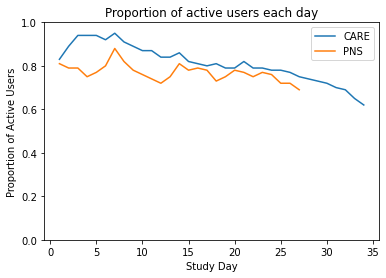

In [491]:
fig = plt.figure()

plt.plot(care_df['new_day_modified'], care_df['Part_ID_modified'])
plt.plot(pns_df['study_day_modified'], pns_df['id_modified'])
      
#plt.xlim(-10,30)
plt.ylim(0,1)
plt.legend(['CARE', 'PNS'])
plt.xlabel('Study Day')
plt.ylabel('Proportion of Active Users')
plt.title('Proportion of active users each day')

plt.show()

In [50]:
total_comp_miss_incomp_df['new_day_modified'] = total_comp_miss_incomp_df['new_day'] + 7

In [51]:
# create data
t = total_comp_miss_incomp_df.shape[0]
i = 0
x = []
y1_list = []
y2_list = []
y3_list = []

for i in range(0,t):
    
    x.append(str(round(total_comp_miss_incomp_df.new_day_modified[i])))
    
    y1_list.append(total_comp_miss_incomp_df.complete_ema_percent[i])
    y2_list.append(total_comp_miss_incomp_df.incomplete_ema_percent[i])
    y3_list.append(total_comp_miss_incomp_df.missing_ema_percent[i])
    
        
y1 = np.array(y1_list)
y2 = np.array(y2_list)
y3 = np.array(y3_list)

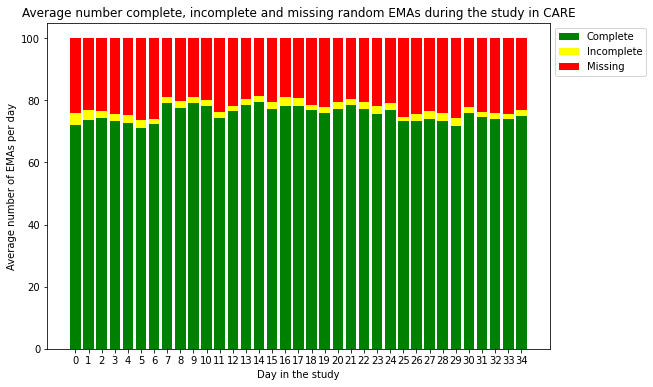

In [52]:
# plot bars in stack manner
# Choose columns in the order to "stack" them
plt.figure(figsize=(9, 6))
plt.title("Average number complete, incomplete and missing random EMAs during the study in CARE")
plt.xlabel("Day in the study")
plt.ylabel("Average number of EMAs per day")

plt.bar(x, y1, color='green', label="Complete")
plt.bar(x, y2, bottom=y1, color='yellow', label="Incomplete")
plt.bar(x, y3, bottom=y1+y2, color='red', label="Missing")
plt.legend(bbox_to_anchor =(1.00, 1.00), ncol = 1)

plt.show()

In [55]:
total_new_df['new_day_modified'] = total_new_df['new_day'] + 7

In [58]:
# create data
t = total_new_df.shape[0]
i = 0
x = []
y1_list = []
y2_list = []
y3_list = []

for i in range(0,t):
    
    x.append(str(round(total_new_df.new_day_modified[i])))
    
    y1_list.append(total_new_df.complete_avg_ema[i])
    y2_list.append(total_new_df.incomplete_avg_ema[i])
    y3_list.append(total_new_df.missing_avg_ema[i])
        
y1 = np.array(y1_list)
y2 = np.array(y2_list)
y3 = np.array(y3_list)

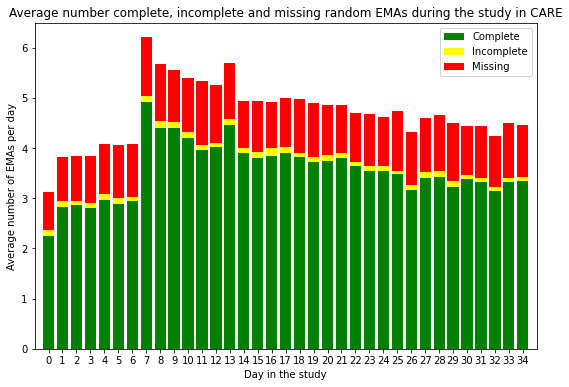

In [64]:
# plot bars in stack manner
# Choose columns in the order to "stack" them
plt.figure(figsize=(9, 6))
plt.title("Average number complete, incomplete and missing random EMAs during the study in CARE")
plt.xlabel("Day in the study")
plt.ylabel("Average number of EMAs per day")

plt.bar(x, y1, color='green', label="Complete")
plt.bar(x, y2, bottom=y1, color='yellow', label="Incomplete")
plt.bar(x, y3, bottom=y1+y2, color='red', label="Missing")
plt.legend(bbox_to_anchor =(1.00, 1.00), ncol = 1)

plt.xlim(-1,35)
plt.ylim(0,6.5)
plt.show()

# TODO for both PNS and CARE